In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/btcinusd/BTC-2019min.csv
/kaggle/input/btcinusd/BTC-Hourly.csv
/kaggle/input/btcinusd/BTC-Daily.csv
/kaggle/input/btcinusd/BTC-2020min.csv
/kaggle/input/btcinusd/BTC-2017min.csv
/kaggle/input/btcinusd/BTC-2018min.csv
/kaggle/input/btcinusd/BTC-2021min.csv


# First Read in The File

In [2]:
df = pd.read_csv('/kaggle/input/btcinusd/BTC-Daily.csv')
del df["unix"]
df

,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,2022-03-01 00:00:00,BTC/USD,43221.71,43626.49,43185.48,43185.48,4.900629e+01,2.116360e+06
1,2022-02-28 00:00:00,BTC/USD,37717.10,44256.08,37468.99,43178.98,3.160618e+03,1.364723e+08
2,2022-02-27 00:00:00,BTC/USD,39146.66,39886.92,37015.74,37712.68,1.701817e+03,6.418008e+07
3,2022-02-26 00:00:00,BTC/USD,39242.64,40330.99,38600.00,39146.66,9.127241e+02,3.573010e+07
4,2022-02-25 00:00:00,BTC/USD,38360.93,39727.97,38027.61,39231.64,2.202852e+03,8.642149e+07
...,...,...,...,...,...,...,...,...
2646,2014-12-02 00:00:00,BTC/USD,378.39,382.86,375.23,379.25,2.593576e+06,6.832530e+03
2647,2014-12-01 00:00:00,BTC/USD,376.40,382.31,373.03,378.39,2.520662e+06,6.660560e+03
2648,2014-11-30 00:00:00,BTC/USD,376.57,381.99,373.32,373.34,1.145567e+06,3.046330e+03
2649,2014-11-29 00:00:00,BTC/USD,376.42,386.60,372.25,376.72,2.746157e+06,7.245190e+03


In [3]:
import matplotlib.pyplot as plt #Get a plotting tool on hand.

In [4]:
# Converting datetime from string to datetime ( Needed for time-series indexing )
import datetime as dt

def string_to_date(s):
    s = s.split(" ")
    s = s[0]
    s = s.split("-")
    year, month, day = int(s[0]), int(s[1]), int(s[2])
    return dt.datetime(year=year, month=month, day=day)

df['date'] = df['date'].apply(string_to_date)
df['date']

0      2022-03-01
1      2022-02-28
2      2022-02-27
3      2022-02-26
4      2022-02-25
          ...    
2646   2014-12-02
2647   2014-12-01
2648   2014-11-30
2649   2014-11-29
2650   2014-11-28
Name: date, Length: 2651, dtype: datetime64[ns]

In [5]:
df.index = df.pop("date") # Set date as index
df

,symbol,open,high,low,close,Volume BTC,Volume USD
date,,,,,,,
2022-03-01,BTC/USD,43221.71,43626.49,43185.48,43185.48,4.900629e+01,2.116360e+06
2022-02-28,BTC/USD,37717.10,44256.08,37468.99,43178.98,3.160618e+03,1.364723e+08
2022-02-27,BTC/USD,39146.66,39886.92,37015.74,37712.68,1.701817e+03,6.418008e+07
2022-02-26,BTC/USD,39242.64,40330.99,38600.00,39146.66,9.127241e+02,3.573010e+07
2022-02-25,BTC/USD,38360.93,39727.97,38027.61,39231.64,2.202852e+03,8.642149e+07
...,...,...,...,...,...,...,...
2014-12-02,BTC/USD,378.39,382.86,375.23,379.25,2.593576e+06,6.832530e+03
2014-12-01,BTC/USD,376.40,382.31,373.03,378.39,2.520662e+06,6.660560e+03
2014-11-30,BTC/USD,376.57,381.99,373.32,373.34,1.145567e+06,3.046330e+03


# Plot All Attributes against the target ( "Close" )

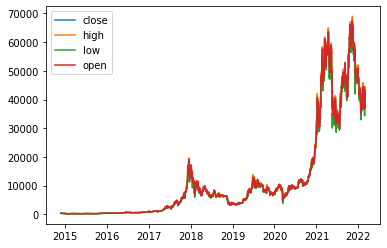

In [6]:
plt.plot(df['close']);
plt.plot(df['high'])
plt.plot(df['low'])
plt.plot(df['open'])
plt.legend(['close','high','low','open']);

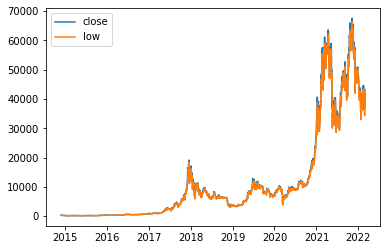

In [7]:
plt.plot(df['close']);
plt.plot(df['low'])
plt.legend(['close','low']);

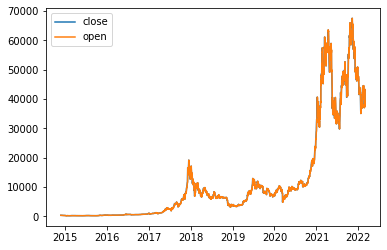

In [8]:
plt.plot(df['close']);
plt.plot(df['open'])
plt.legend(['close', 'open']);

In [9]:
df = df.drop("Volume BTC", axis=1)
df = df.drop("Volume USD", axis=1)
df

,symbol,open,high,low,close
date,,,,,
2022-03-01,BTC/USD,43221.71,43626.49,43185.48,43185.48
2022-02-28,BTC/USD,37717.10,44256.08,37468.99,43178.98
2022-02-27,BTC/USD,39146.66,39886.92,37015.74,37712.68
2022-02-26,BTC/USD,39242.64,40330.99,38600.00,39146.66
2022-02-25,BTC/USD,38360.93,39727.97,38027.61,39231.64
...,...,...,...,...,...
2014-12-02,BTC/USD,378.39,382.86,375.23,379.25
2014-12-01,BTC/USD,376.40,382.31,373.03,378.39
2014-11-30,BTC/USD,376.57,381.99,373.32,373.34


# Getting Corelation 

In [10]:
df = df.corr() # If correlation is closer to one then there is a relationship, the attribute should be kept.
df

,open,high,low,close
open,1.000000,0.999485,0.998983,0.998798
high,0.999485,1.000000,0.998901,0.999474
low,0.998983,0.998901,1.000000,0.999319
close,0.998798,0.999474,0.999319,1.000000
